# Ali Hamama
## Task 1 - Predicting student's score based on the no. of study hours

### Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

### Load and Explore Data

In [137]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [138]:
# Display some Statistical information
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [186]:
# explore data type and check if there are any NULL values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours'>

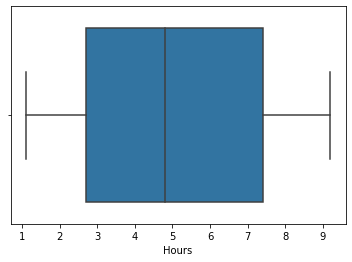

In [11]:
# Check for outliers
sns.boxplot(x=data['Hours'])

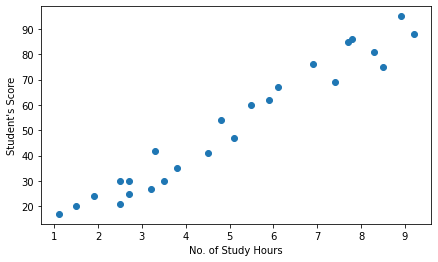

In [176]:
# Plot the data
plt.figure(figsize=(7,4))
plt.scatter(x_data,y_data)
plt.xlabel('No. of Study Hours')
plt.ylabel("Student's Score")
plt.show()

### Prepare Data to fit the model

In [140]:
# Separate data to Features and Target (x,y)
x_data = data[['Hours']].values
y_data = data[['Scores']].values

# Split the data with 20% for testing set and 80% for training set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [141]:
# check for the shapes and number of samples
x_train.shape, x_test.shape

((20, 1), (5, 1))

### Model initialization

In [142]:
# initialize instance from LinearRegression as model
model = lr()

# fit the model with training samples
model.fit(x_train,y_train)

LinearRegression()

In [167]:
# Evaluate model performance

# the Score measurement is the Coefficient of Determination i.e: (1 - (TSS/RSS)) 
COD_score = model.score(x_test, y_test)

# Mean Squared Error
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
MSE_score = mean_squared_error(y_pred, y_test)

print(f'Coefficient of Determination Score: {COD_score}\nMSE-Mean Squared Error: {MSE_score}')

Coefficient of Determination Score: 0.8620963721295296
MSE-Mean Squared Error: 62.0014710905635


### Plot Model and Data

In [168]:
# Find the model Coefficient and Intercept
inter = model.intercept_
coef = model.coef_

# construct the model formula
y_hat = inter + coef*x_data

Text(0, 0.5, "Student's Score")

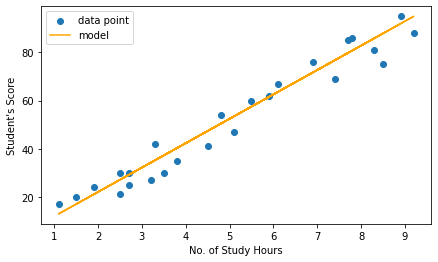

In [173]:
plt.figure(figsize=(7,4))
plt.scatter(x_data,y_data)
plt.plot(x_data,y_hat,c='orange')
plt.legend(['data point','model'])
plt.xlabel('No. of Study Hours')
plt.ylabel("Student's Score")

### Make a Prediction

In [183]:
# Predict student's score with 9.25 hours of study 
pred = model.predict(np.array(9.25,ndmin=2))
print(f"No. of study hours: 9.25\nPredicted Score is: {round(pred[0][0],2)} ")

No. of study hours: 9.25
Predicted Score is: 95.46 


### Plot Final Result

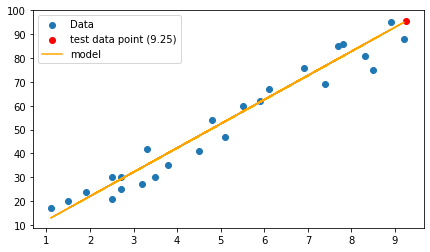

In [185]:
plt.figure(figsize=(7,4))
plt.scatter(x_data,y_data)
plt.scatter(9.25,preds,c='red')
plt.plot(x_data,y_hat,c='orange')
plt.legend(['Data','test data point (9.25)','model'])

plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.show()